In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="https://raw.githubusercontent.com/malkaguillot/Foundations-in-Data-Science-and-Machine-Learning/refs/heads/main/docs/utils/custom.css">
<link rel="stylesheet" type="text/css" href="../utils/custom.css">

## Foundations in Data Science and Machine Learning
# Module 5a: Machine Learning - Regression
### Malka Guillot

<img src="../utils/img/logo-hsg.png" alt="HSG Logo" style="position: relative; bottom: 50px; left: 600px; width: 100px;">

### References

- <i class="fa fa-book fa-fw" aria-hidden="true"></i> [Békés & Kézdi (2022)](https://gabors-data-analysis.com/) 13 & 14
- <i class="fa fa-book fa-fw" aria-hidden="true"></i> [Introduction to Statistical Learning](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) chap 1. & 2 & 5.1
-  Kleinberg, Ludwig, Mullainathan, and Obermeyer (2015), ["Prediction Policy Problems."](https://www.aeaweb.org/articles?id=10.1257/aer.p20151023) American Economic Review, 105 (5), pp. 491-95.
- Mullainathan and Spiess (2017), ["Machine Learning: An Applied Econometric Approach"]((https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.31.2.87)), Journal of Economic Perspectives, 31 (2), pp. 87-106,


## What is ML?

A concise definition by Athey (2018):

<midd-blockquote>
"...[M]achine learning is a field
that develops algorithms designed to be applied to datasets, with the main areas of focus being prediction (regression), classification, and clustering or grouping tasks."
</midd-blockquote>

Specifically, there are three broad classifications of ML problems:  

  + supervised learning.  
  + unsupervised learning.  
  + reinforcement learning.  
  

> Most of the hype you hear about in recent years relates to supervised learning, and in particular, deep learning.

### ML Landscape
<div class="r-stack"><img src="images/mltypes.png" style="height: 500px;" > </div>


### An Aside: ML and Artificial Intelligence (AI)
<div class="r-stack"><img src="images/DL-ML-AI.png" style="height: 300px;" > </div>


### Unsupervised Learning

In *unsupervised* learning, the goal is to divide high-dimensional data into clusters that are **similar** in their set of features $(X)$.

Examples of algorithms:  
  - principal component analysis (PCA)
  - $k$-means clustering
  - Latent Dirichlet Allocation (LDA) 
  
Applications:  
  - image recognition
  - cluster analysis
  - topic modelling

### Example: Clustering OECD Inflation Rates

<div class="r-stack"><img src="images/clustInflationCropped.jpg" style="height: 300px;" > </div>

Source: [Baudot-Trajtenberg and Caspi (2018)](https://www.bis.org/publ/bppdf/bispap100_l.pdf)

### Reinforcement Learning (RL)
 
A definition by Sutton and Barto (2018):

<midd-blockquote>
_"Reinforcement learning is learning what to do—how to map situations to actions—so as to maximize a numerical reward signal. The learner is not told which actions to take, but instead must discover which actions yield the most reward by trying them."_
</midd-blockquote>


Prominent examples:

- Games (e.g., Chess, AlphaGo).

- Autonomous cars.

### Supervised Learning

Consider the following data generating process (DGP):

$$Y=f(\boldsymbol{X})+\epsilon$$
where $Y$ is the outcome variable, $\boldsymbol{X}$ is a $1\times p$ vector of "features", and $\epsilon$ is the irreducible error.  

- __Training set__ ("in-sample"): $\\{(x_i,y_i)\\}_{i=1}^{n}$
- __Test set__ ("out-of-sample"): $\\{(x_i,y_i)\\}_{i=n+1}^{m}$


<div class="r-stack"><img src="images/train_test.png" style="height: 80px;" > </div>


Typical assumptions: (1) independent observations; (2) stable DGP across training *and* test sets.

### The Goal of Supervised Learning

Use a labelled test set ($X$ and $Y$ are known) to construct $\hat{f}(X)$ such that it _generalizes_ to unseen test set (only $X$ is known).

- If $Y$ is continuous: **regression problem**, 
  - we are interested in estimating the conditional mean function $E[Y|X]$.
  - Example: Predicting house prices based on their features (e.g., size, location, number of bedrooms).

- If $Y$ is categorical: **classification problem**, 
  - we are interested in estimating the conditional probability function $P(Y|X)$.
  - Example: Predicting whether an email is spam or not based on its content.

### Supervised Learning Algorithms

ML comes with a rich set of parametric and non-parametric prediction algorithms (approximate year of discovery in parenthesis):

- Linear and logistic regression (1805, 1958).
- Decision and regression trees (1984).  
- K-Nearest neighbors (1967).  
- Support vector machines (1990s).  
- Neural networks (1940s, 1970s, 1980s, 1990s).  
- Simulation methods (Random forests (2001), bagging (2001), boosting (1990)).  
- etc.

### Recent Application

<div class="r-stack"><img src="images/hrnn.png" style="height: 350px;" > </div>


Source: [Barkan et al. (2021)](https://arxiv.org/abs/2011.07920)

### Supervised ML Workflow

  - <g>Step 1: Define the Prediction Task</g>
    - Pre-processing of the input variables
    - Decompose the observations in test/training set
  - <g>Step 2: Explore the Data</g>
  - <g>Step 3: Set Model and Tuning Parameters</g>
    - On a restricited sample: the <bcolor>Training set</bcolor>
  - <g>Step 4:(Cross-)validation</g>
    - Test the validity of the model on a <bcolor> validation set</bcolor> 
      - = A sample of the labeled data that had been held out
    - Measure the model performance and select the best parameters
  - <g>Step 5: Evaluate the Model</g>
    - Training the best model on the training set and evaluate the model using the test set
  - <g>Step 6: Once happy, train the model on the full labeled set</g>



<h2 style="color: blue;">Step 1: Define the Prediction Task</h2>

##

### Boston housing data

We will use the **Boston housing data**: housing data for 506 census tracts of Boston from the 1970 census (Harrison and Rubinfeld, 1978).

The sample is available from `sklearn` and contains :
- 13 attributes of housing markets around Boston 
  - `medv` (target): median value of owner-occupied homes in USD 1000's.
  - `lstat`(predictor): percentage of lower status of the
  population.
  - `chas` (predictor): Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- 506 entries: aggregated data for homes from various suburbs in Boston, Massachusetts.

*Objective*: **predict the value of prices `medv`** of the house using the given features

### Set up and load data

In [2]:
import numpy as np
import pandas as pd
# import patsy

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../data/BostonHousing.csv")

The data contain the following variables:

| **Variable** | **Description** |
|--------------|-----------------|
| CRIM         | per capita crime rate by town |
| ZN           | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS        | proportion of non-retail business acres per town |
| CHAS         | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX          | nitric oxides concentration (parts per 10 million) |
| RM           | average number of rooms per dwelling |
| AGE          | proportion of owner-occupied units built prior to 1940 |
| DIS          | weighted distances to five Boston employment centres |
| RAD          | index of accessibility to radial highways |
| TAX          | full-value property-tax rate per $10,000 |
| PTRATIO      | pupil-teacher ratio by town |
| B            | 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town |
| LSTAT        | % lower status of the population | 

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Create $X$ and $y$

In [5]:
X_full=df.drop('medv', axis=1)
y_full= df['medv']

n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples, n_features)

506 13


In [6]:
X_full.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Look for `NA` values in the dataset

In [7]:
X_full.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

There is none

<h2 style="color: blue;">Step 2: Exploratory Data Analysis</h2>

##

### Quantity to predict= price (`target` or $y$) 

Before the regression, let us inspect the features and their distributions. 

In [8]:
y_full.shape

(506,)

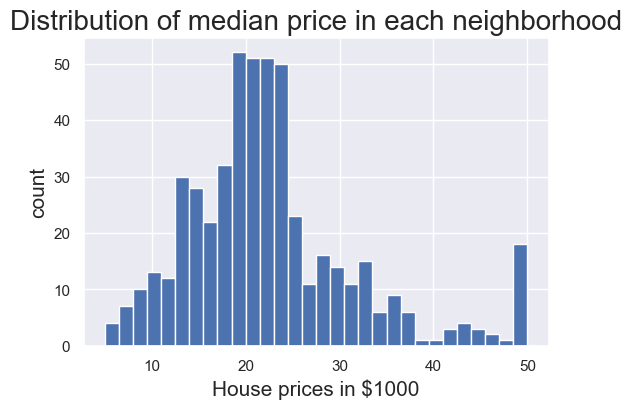

In [9]:
sns.set(rc={'figure.figsize':(6,4)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $1000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

### Features ($X$) used for prediction

In [10]:
X_full.shape

(506, 13)

#### Distributions
**Histogram plots** to look at the distribution

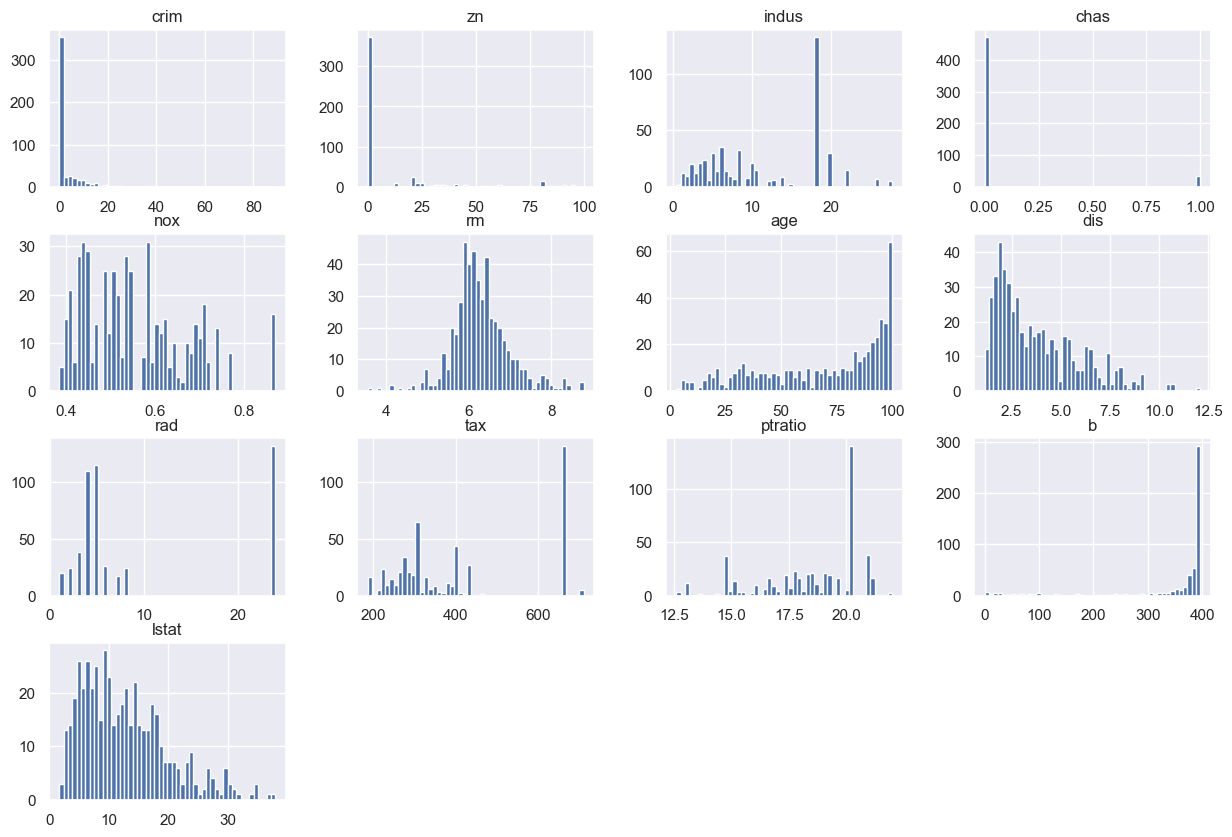

In [11]:
X_full.hist(bins=50, figsize=(15,10))
plt.show()

### Correlations

**Boston Correlation Heatmap Example with Seaborn**

The seaborn package offers a heatmap that will allow a two-dimensional graphical representation of the Boston data. The heatmap will represent the individual values that are contained in a matrix are represented as colors.

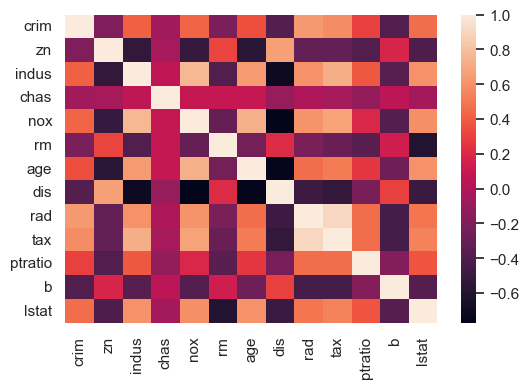

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
correlation_matrix = X_full.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

### Check for multicolinearity

An important point in selecting features for a linear regression model is to check for **multicolinearity**. 

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. 

Same goes for the features DIS and AGE which have a correlation of -0.75.

### Correlation plots

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='b', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: xlab

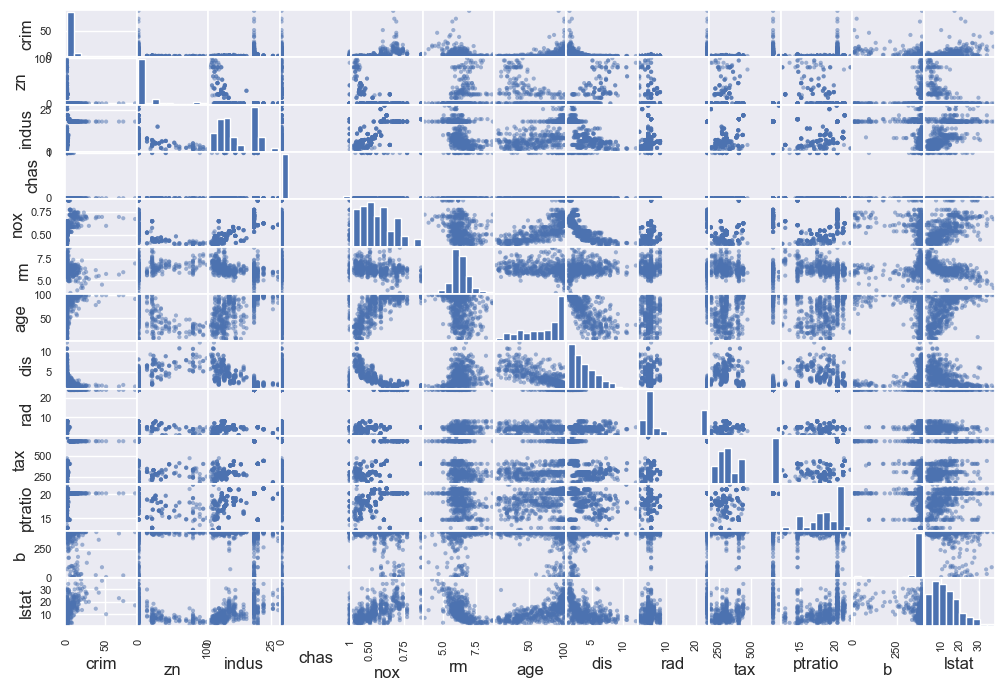

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_full, figsize=(12, 8))

### Scatter plot relative to the target (price)

In [14]:
(X_full.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

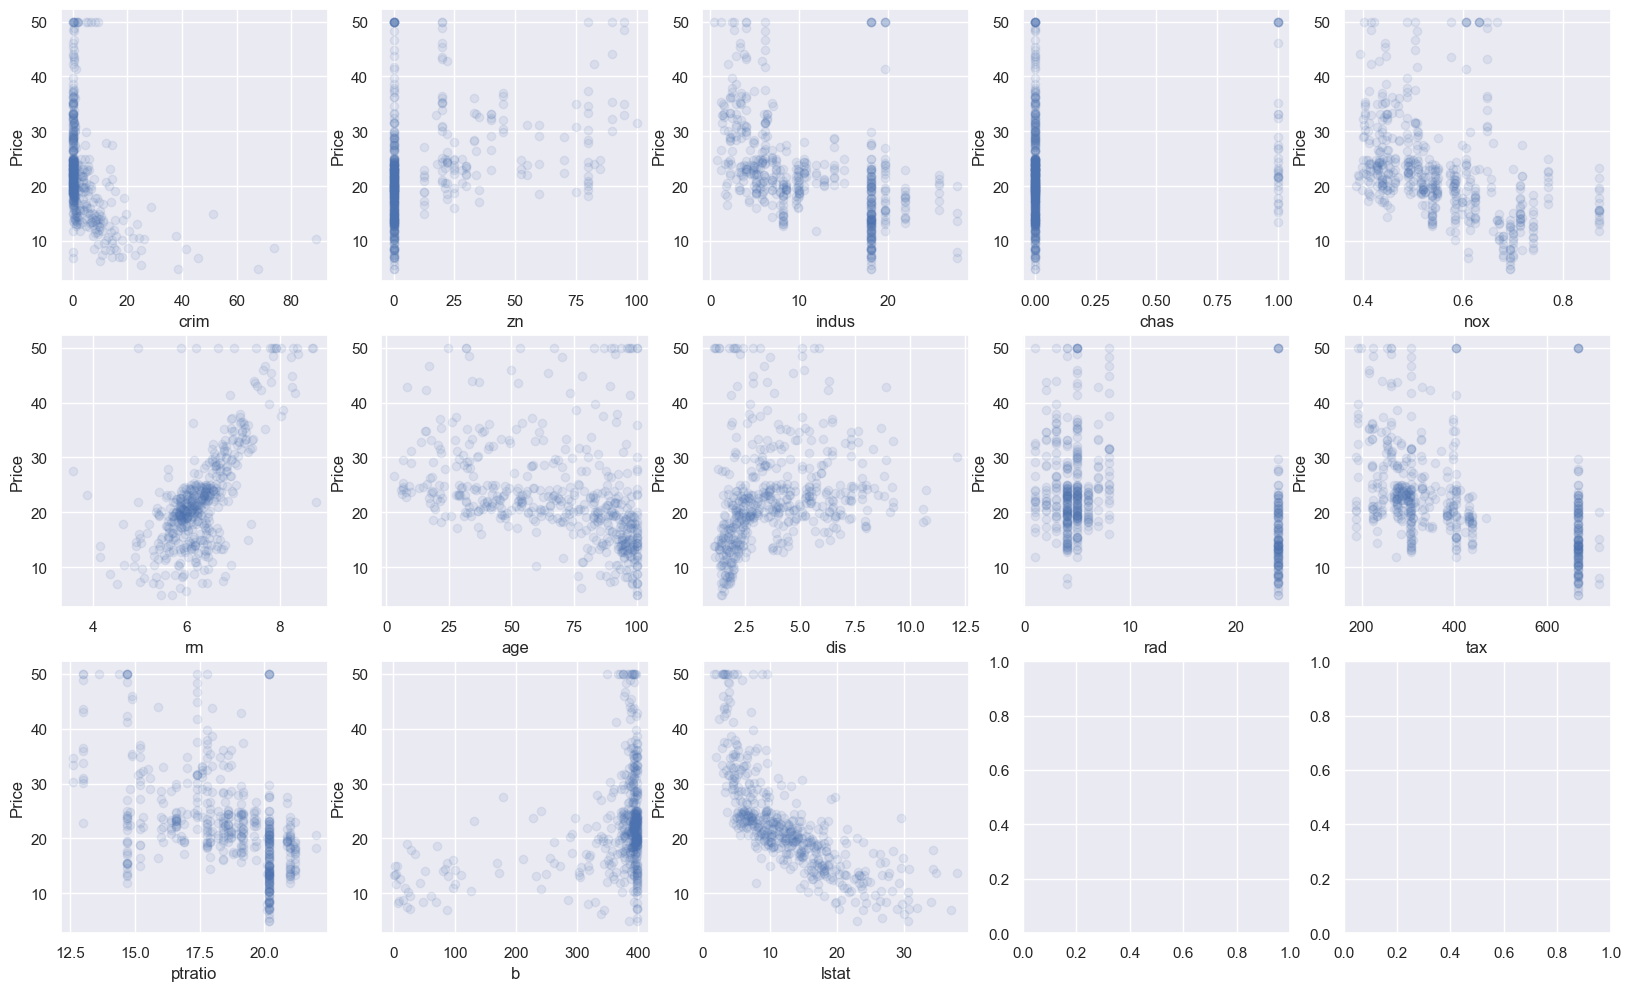

In [15]:
fig, axs= plt.subplots(3, 5, figsize=(20, 12))
i=0
for ax in axs.flat:
    if i<len(X_full.columns):
        feature_name = X_full.columns[i]  
        ax.scatter(X_full[feature_name], y_full, alpha=0.1)
        ax.set(xlabel=feature_name, ylabel='Price')
        i=i+1


### What can we say ? 

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

## Linear Regression as a predictive model

### Model building

- Deciding about the predictors to include in the model and their functional form.

-  We have strong computers, cloud, etc - why could not we try out all possible models and pick the best one?
   -  Too many models possible! 

- 2 methods to build models:
  1. By hand -- mix domain knowledge and statistics 
  2. By Smart algorithms $=$ machine learning

### Linear Regression 

$$Y=\beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

$=$ one of the simplest algorithms for doing supervised learning

A good starting point before studying more complex learning methods

Interpretation of $\beta_j$ = the average effect on $Y$ of a unit increase in $X_j$ holding all other predictors fixed

### Linear estimate

<div class="r-stack"><img src="images/jwht-fig2-4.png" style="height: 400px;" > </div>

Notes:
the true $f$ has some curvature that is not captured in the linear fit

### Linear Models: pros and cons

- [Pros]():
  - Interpretability
  - Good predictive performance
  - Accuracy measures for
      - coefficient estimates (standard errors and confidence intervals)
      - the model

- [Cons]():
  - When $p>n$
  - Tend to over-fit training data.
  - Cannot handle multicollinearity.

## Core ML concepts

### Undefittin vs. Overfitting: Split the Sample Between Three Economists
#### Underffiting: High Bias, Low Variance
The model: unconditional mean
$$Y_i = \beta_0+\varepsilon_i$$

<div class="r-stack"><img src="images/conso-cpi-2.png" style="width: 300px;" > </div> 


#### Overfitting: Low Bias, High Variance
The model: high-degree polynomial

$$Y_i = \beta_0+\sum_{j=1}^{\lambda}\beta_jX_i^{\lambda}+\varepsilon_i$$
<div class="r-stack"><img src="images/conso-cpi-3.png" style="width: 300px;" > </div> 



#### "Justfitting": Bias and Variance are Just Right
The model: linear regression

$$Y_i = \beta_0+\beta_1 X_i + \varepsilon_i$$
<div class="r-stack"><img src="images/conso-cpi-5.png" style="width: 300px;" > </div> 


#### The Typical Bias-Variance Trade-off in ML

Typically, ML models strive to find levels of bias and variance that are "just right":
<div class="r-stack"><img src="images/biasvariance1.png" style="width: 350px;" > </div> 

### When is the Bias-Variance Trade-off Important?

In low-dimensional settings ( $n\gg p$ )  
  + overfitting is highly __unlikely__  
  + training MSE closely approximates test MSE  
  + conventional tools (e.g., OLS) will perform well on a test set

INTUITION: As $n\rightarrow\infty$, insignificant terms will converge to their true value (zero).

In high-dimensional settings ( $n\ll p$ )  
  + overfitting is highly __likely__  
  + training MSE poorly approximates test MSE  
  + conventional tools tend to overfit  
  
$n\ll p$ is prevalent in big-data

### Measuring the Performance of a Model using Mean Squared Error (MSE)

$$MSE= \frac{1}{n} \sum_{i=1}^n (y_i - \hat f(x_i))^2$$

- **Regression setting**: the <bcolor>mean squared error</bcolor> is a metric of how well a model fits the data.


MSE will be small if the predicted responses are very close to the true responses,and will be large if for some of the observations, the predicted and true responses differ substantially

= Aggregated measure of the errors 

### Avoiding Overfitting: train/test split

#### Training MSE, test MSE and model flexibility

<img src="images/jwht-fig2-9.png"  style="height: 300px; position:relative;     margin-left: auto;margin-right: auto;display: block" >
Red (grey) curve is test (train) MSE

Increasing model flexibility tends to <bcolor>decrease</bcolor> training MSE but will eventually <bcolor>increase</bcolor> test MSE

- Left:Data simulated from $f$, shown in black.
- Three estimates of $f$ are shown:
    - the linear regression line (orange curve),
    - and two smoothing splinefits (blue and green curves).
- Right:Training MSE (grey curve), test MSE (red curve), and minimum possible test MSE over all methods (dashed line).
- Squares represent the training and test MSEs for the three fits shown in the left-hand panel.

- we observe a monotone decrease in the training MSE and a U-shape in the test MSE

### Overfitting

- As model flexibility increases, training MSE will decrease, but the test MSE may not.

- When a given method yields a small training MSE but a large test MSE, we are said to be **overfitting** the data.

- (We almost always expect the training MSE to be smaller than the test MSE)

- Estimating test MSE is important, but requires training data...

## Regularization methods

### Context: Generalization of the Linear Models

- <bcolor>Regularized fitting</bcolor>: ridge regression and lasso

- <bcolor>Non-linearity</bcolor>: nearest neighbor methods

- <bcolor>Interactions</bcolor>: Tree-based methods, random forests and boosting

### Why Regularization?

- Key question: which features to enter into model, how to select?
  - There is room for an automatic selection process.
  
- Solution against <bcolor>overfitting</bcolor>

-  Allow High-Dimensional Predictors
  - $p>>n$: OLS no longer has a unique solution
  - $x_i$ "high-dimensional" i.e. very many regressors
    - pixels on a picture

Notes:
Corollary of regularization:
- Prediction Accuracy:especially when $p > n$, to control the variance

### Adding a Regularization Term to the Loss Function $L(.)$

$$ \hat \beta =arg min_\beta \frac{1}{n} \sum_{i=1}^n L(h(x_i, \beta), y_i) +\lambda R(\beta) $$

- $R(\beta)$ = <bcolor> regularization  function </bcolor>
  - $R(\beta)=\sum_{i=1}^n p(\beta_i)$ for $p(.)$ the penalty function
  - measures the <bcolor>expressiveness</bcolor> of the model

- As the number of features grows, linear models become more expressive. 

- $\lambda$ is a <bcolor>hyperparameter</bcolor> where higher values increase regularization

#### Notation: Norms

Suppose $\boldsymbol{\beta}$ is a $p\times 1$ vector with typical element $\beta_i$. 

- The $\ell_0$-norm is defined as 
$\lVert\boldsymbol{\beta}\rVert_0 = \sum_{j=1}^p \boldsymbol{1}\\{\beta_j \neq 0\\}$
, 
  - i.e., the number of non-zero elements in $\boldsymbol{\beta}$.  


- The $\ell_1$-norm is defined as $\lVert\boldsymbol{\beta}\rVert_1=\sum_{j=1}^{p}|\beta_j|$.  

- The $\ell_2$-norm is defined as $\lVert\boldsymbol{\beta}\rVert_2=\left(\sum_{j=1}^{p}|\beta_j|^2\right)^{\frac{1}{2}}$
  - i.e., Euclidean norm.

### Commonly used penalty functions

Regularization problem:

$$\underset{\beta_{0}, \beta}{\operatorname{min}} \sum_{i=1}^{N}\left(y_{i}-\beta_{0}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\lambda R(\beta)$$

|  Method          |  $R(\boldsymbol{\beta})$             | 
|:-----------------|:-------------------------------------|
|  <bcolor>OLS</bcolor>              | 0                                    |
|  <bcolor>Subset selection</bcolor> | $\lVert\boldsymbol{\beta}\rVert_0$   |
|  <bcolor>Lasso</bcolor>            | $\lVert\boldsymbol{\beta}\rVert_1$   |
|  <bcolor>Ridge</bcolor>            | $\lVert\boldsymbol{\beta}\rVert_2^2$ |
|  <bcolor>Elastic Net</bcolor>      | $\alpha\lVert\boldsymbol{\beta}\rVert_1 + (1-\alpha)\lVert\boldsymbol{\beta}\rVert_2^2$             |

### Prerequisite: centering and scaling

In what follows, we assume that each feature is centered and scaled to have mean zero and unit variance, as follows:

$$\frac{x_{ij} - \widehat\mu_i}{\widehat\sigma_{i}}, \qquad\text{for }j=1,2, \ldots, p$$

where $\widehat\mu_i$ and $\widehat\sigma_i$ are the estimated mean and standard deviation of $x_i$ estimated over the _training_ set.

**Remark:** This is not important when using OLS (why?)

### Ridge Regression

$$\min_{\beta} \sum_{i=1}^n \left(y_i - \beta_{0}-\sum_{j=1}^{p} x_{i j} \beta_{j} \right)^2 + \lambda \sum_{j=1}^p \beta_j^2 $$

Where
- $\lambda > 0$ = penalty parameter
- covariates can be high-dimensionnal $p>>N$

Trade-off, from the minimization of the sum of
1. RSS
2. shrinkage penalty: decreases with $\beta_j$

$\rightarrow$ relative importance given by $\lambda$

- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
- When $\lambda=0$, the penalty term has no effect, and ridge regression will produce the least squares estimates
- when $\lambda \rightarrow \infty$ : penalty grows and coefficient estimates approach zero

### Ridge Regression: shrinkage to $0$
<img src="images/jwht-fig6-4.png"  style="height: 300px; position:relative;     margin-left: auto;margin-right: auto;display: block" >

Notes:
Next: Why Does Ridge Regression Improve Over Least Squares?

### Ridge: Variance-Bias Trade-Off
<img src="images/jwht-fig6-5.png"  style="height: 400px; position:relative;     margin-left: auto;margin-right: auto;display: block" >

Squared bias (black), variance (green), [test] MSE (red)

- As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias
- Up to 10, the variance decreases rapidly, with very little increase in bias
- Beyond this point, the decrease in variance due to increasing $\lambda$ slows, and the shrinkage on the coefficients causes them to be significantly underestimated
- Recall that the test MSE (purple), is a function of the variance plus the squared bias.

### Ridge vs. Linear Models

- when outcome and predictors are close to having a linear relationship, the OLS will have low bias but potentially high variance
  - small change in the training data $\rightarrow$ large change in the estimates
  - worse with $p$ close tp $n$
  - if $p>n$, OLS do not have a unique solution

$\rightarrow$ ridge regression works best in situations where the least squares estimates have high variance

### LASSO
Least Absolute Shrinkage and Selection Operator

LASSO proposes a method to build a model which just <bcolor>includes the most important predictors</bcolor>.

Modifies the way regression coefficients are estimated by adding a penalty
term for too many coefficients

Notes:
Ridge: the penalty shinks coefficients toward $0$ but not exactly to $0$

This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation when $p$ is quite large

### Lasso 

$$ \hat \beta =arg min_\beta \frac{1}{n} \sum_{i=1}^n \left( y_i -(\beta_0 + \sum_{j=1}^k\beta_jx_{ij})\right)^2 +\lambda \sum_{j=1}^k |\beta_j| $$

- $R(\beta)= \sum_{j=1}^k |\beta_j|=$ <bcolor> regularization  function </bcolor>
with a $\ell_1$-norm penalty function

- $\lambda$ is a <bcolor>hyperparameter</bcolor> (or tunning) where higher values increase regularization

Notes:
- **Lasso** automatically performs feature selection and outputs a sparse model.

### Lasso Coefficients
<img src="images/jwht-fig6-6.png"  style="height: 400px; position:relative;     margin-left: auto;margin-right: auto;display: block" >

- When $\lambda=0$: the lasso simply gives the least squares fit
- when $\lambda$ becomes sufficiently large, the lasso gives the null model in which all coefficient estimates equal 0.
- in between these two extremes, the ridge regression and lasso models are quite different from each other

### Lasso: Variance-Bias Trade-Off
<img src="images/jwht-fig6-8.png"  style="height: 400px; position:relative;     margin-left: auto;margin-right: auto;display: block" >

Squared bias (black), variance (green), [test] MSE (red)

### Constrained Regression
The minimization problem can be written as follow:

$$ \sum_{i=1}^n(y_i-x_i'\beta)^2 \textrm{ s.t. } \sum_{j=1}^p p(\beta_j) \leq s,$$

Where
- Ridge: $\sum_{j=1}^p \beta_j^2 <s $
$\rightarrow$ equation of a <bcolor>circle</bcolor>
- Lasso: $\sum_{j=1}^p |\beta_j| <s $
$\rightarrow$ equation of a <bcolor>diamond</bcolor>

Notes:
- Lasso:  we try to find the set of coefficient estimates that lead to the smallest RSS, subject to the constraint that there is a budgets for how large $\sum_{j=1}^p |\beta_j|$ can be.
- if $s$ is extremely large, it is not very restrictive and the least square solution falls within the budget

### Constraint Regions: Lasso vs. ridge

Contours of the error and constraint functions for lasso (left) and ridge (right). 

- The solid blue areas are the constraint regions, $\beta_{1}^{2}+\beta_{2}^{2} \leq \lambda,$ and $|\beta_{1}|+|\beta_{2}| \leq \lambda$ 
- the red ellipses are the contours of the RSS and $\widehat\beta$ is the OLS estimator.

| Lasso | Ridge|
|:------:|:---:|
|<img src="images/jwht-fig6-7lasso.png"  style="height: 200px;" > | <img src="images/jwht-fig6-7ridge.png" style="height: 200px" class="center"> |


- Why is it that the lasso, unlike ridge regression, results in coefficient estimates that are exactly equal to zero?
- diamonds & circle represent the ridge & lasso constraint regions
- the red ellipses are the contours of the RSS (for different levels of RSS): regions centered around $\beta$ of constant value of RSS
- $\hat \beta$ is the least square estimate
- the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis $\rightarrow$ When this occurs, one of the coefficients will equal zero.

### Elastic Net = Lasso + Ridge
$$ MSE(\beta)+\lambda_1 \sum_{j=1}^p |\beta_j| +\lambda_2 \sum_{j=1}^p \beta_j^2$$

$\lambda_1$, $\lambda_2$ $=$ strength of $\ell_1$-norm (Lasso) penalty and $\ell_2^2$-norm (Ridge) penalty

### Selecting Elastic Net Hyperparameters

- Elastic net <bcolor>hyperparameters</bcolor> should be selected to optimize out-of-sample fit (measured by mean squared error or MSE).

- <bcolor>“Grid search”</bcolor>
  - scans over the hyperparameter space ($\lambda_1 \geq 0, \lambda_2\geq 0$),
  - computes out-of-sample MSE for all pairs $(\lambda_1, \lambda_2)$ ,
  - selects the MSE-minimizing model.

## Feature Engineering

### 2 extensions of the Linear Model

Going further model's assumptions:

- the **additive**: the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors

-  **linearity**: the change in the response $Y$ due to a one-unit change in $X_j$ is constant


#### Non Linearity
- Include transformed versions of the predictors in the model


$\Rightarrow$ Including polynomials in $X$ may provide a better fit

## Scikit-Learn Design Overview

#### Transformer (preprocessor): An object that transforms a data set.
- e.g. `preprocessing.StandardScaler`
- Transformation is performed by the `transform()` method.

#### Estimator: an object that can estimate parameters
- e.g. `linear_models.LinearRegression`
- Estimation performed by `fit()` method
- Exogenous parameters (provided by the researcher) are called `hyperparameters`
- The convenience method `fit_transform()` both fits an estimator and returns the transformed input data set.

#### Predictor: An object that forms a prediction from an input data set.
- e.g. `LinearRegression`, after training
- The `predict()` method forms the predictions.
- It also has a `score()` method that measures the quality of the predictions given a test set.

<h2 style="color: blue;">Step 3: set, train and evaluate the model</h2>

##

### Data cleaning
The missing features should be either:
1. dropped
2. imputed to some value (zero, the mean, the median...)

Drop the observations with price >=50 (because of the right censure)

In [16]:
mask=y_full<50

y_full=y_full[mask==True]
X_full=X_full[mask==True]

### Prepare Training and Test Sets using `train_test_split`
Pure ramdomness of the sampling method

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)

print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (392, 13) (392,)
test data (98, 13) (98,)


### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)

$x_1^{scaled} = \frac{x^1 - \bar x_1 }{sd(x^1)}$

- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Select and Train a Model
**Regression algorithm** (we consider firs the `LinearRegression`, more algorithms will be discussed later):

In [19]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [20]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset:0.79


In [22]:
print("R-squared for test dataset:{}".
      format(np.round(lin_reg.score(X_test_scaled, y_test), 2)))

R-squared for test dataset:0.73


Note: $R^2 =$ **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 


#### Coefficients of the linear regression

In [23]:
lin_reg.coef_

array([-0.82250959,  0.96267645, -0.54388693,  0.187684  , -1.50325117,
        2.15830284, -0.54795352, -2.78522878,  2.16616351, -2.21708013,
       -1.8582422 ,  0.71805978, -2.70105292])

In [25]:
print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'crim': -0.82, 'zn': 0.96, 'indus': -0.54, 'chas': 0.19, 'nox': -1.5, 'rm': 2.16, 'age': -0.55, 'dis': -2.79, 'rad': 2.17, 'tax': -2.22, 'ptratio': -1.86, 'b': 0.72, 'lstat': -2.7}


## Choose the best model with cross-validation

### k-fold Cross-validation

Split the training set into $k$ roughly equal-sized parts ( $k=5$ in this example):

<div class="r-stack"><img src="images/train_cross_validate.png" style="width: 500px;" > </div> 


Approximate the test-MSE using the mean of $k$ split-MSEs

$$\text{CV-MSE} = \frac{1}{k}\sum_{j=1}^{k}\text{MSE}_j$$

<h2 style="color: blue;">Step  4: Cross-validation</h2>

##

### K-Fold CV

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [27]:
# Perform 5-fold cross validation
scores = cross_val_score(lin_reg, X_train_scaled, y_train, 
                         scoring="neg_mean_squared_error", # evaluation metrics
                         cv=5)
scores

array([ -7.74021081, -15.46731828, -14.72344763, -17.14433289,
       -18.96092531])

In [28]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lin_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=folds)
scores   

array([-18.32023985, -11.84760498, -17.04867667, -16.44238641,
       -10.9874587 ])

### Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation. 

In [29]:
# 1. create a cross-validation scheme
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=2, shuffle=True) 
kfold

KFold(n_splits=10, random_state=2, shuffle=True)

In [30]:
# 2. specify range of hyperparameters to tune
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10],
      'l1_ratio':[.1,.5,.9,1]}   
]

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# 3. perform grid search
# 3.1 specify model
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()  

In [33]:
# 3.2 call GridSearchCV()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
model_cv = GridSearchCV(elastic_net, param_grid, cv=kfold,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
model_cv

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=ElasticNet(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.1, 0.5, 0.9, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
# fit the model
model_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
             estimator=ElasticNet(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.1, 0.5, 0.9, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004507,0.005245,0.001400,0.002163,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",-13.406530,-14.328648,-12.011451,...,-13.755289,-13.819750,-13.797527,-13.206681,-13.885470,-11.411172,-13.730520,-13.507182,-13.428291,0.698492
1,0.000864,0.000134,0.000324,0.000040,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",-13.408003,-14.328863,-12.011969,...,-13.755289,-13.819749,-13.797526,-13.206680,-13.885470,-11.411172,-13.730519,-13.507181,-13.428290,0.698492
2,0.001147,0.000544,0.000569,0.000521,0.0001,0.9,"{'alpha': 0.0001, 'l1_ratio': 0.9}",-13.409477,-14.329080,-12.012521,...,-13.755288,-13.819749,-13.797526,-13.206680,-13.885469,-11.411171,-13.730518,-13.507181,-13.428289,0.698492
3,0.000787,0.000105,0.000324,0.000050,0.0001,1.0,"{'alpha': 0.0001, 'l1_ratio': 1}",-13.409844,-14.329135,-12.012652,...,-13.755288,-13.819749,-13.797525,-13.206680,-13.885469,-11.411171,-13.730518,-13.507181,-13.428289,0.698492
4,0.000756,0.000107,0.000287,0.000008,0.0010,0.1,"{'alpha': 0.001, 'l1_ratio': 0.1}",-13.354994,-14.323175,-11.994855,...,-13.755485,-13.819927,-13.797724,-13.206868,-13.885637,-11.411323,-13.730734,-13.507338,-13.428476,0.698504


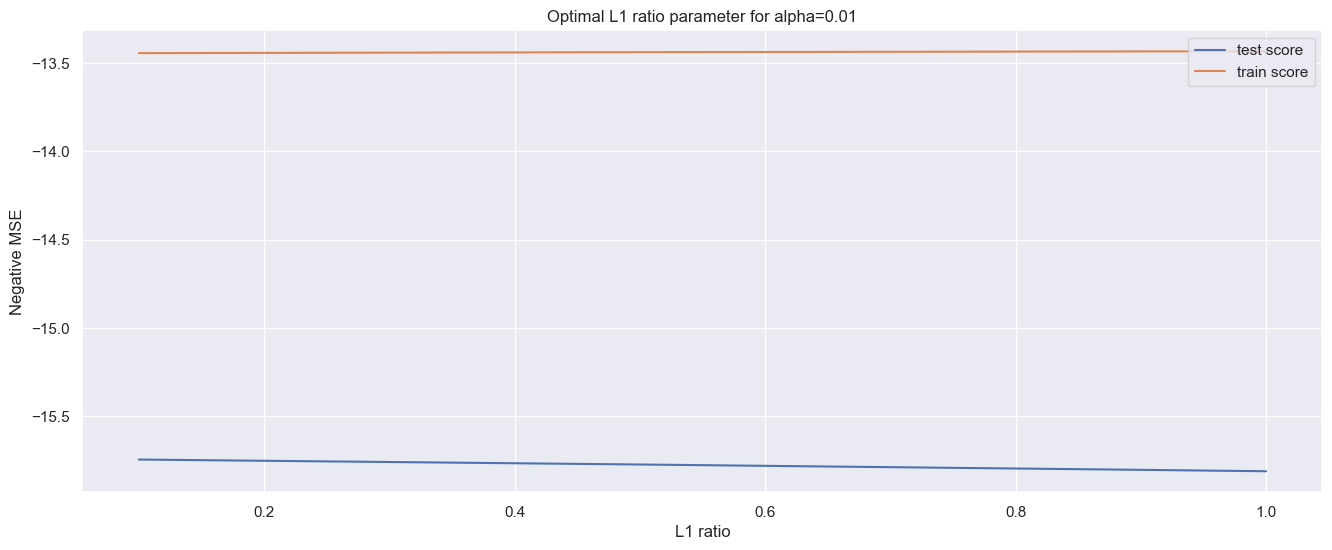

In [36]:
# plotting cv results
plt.figure(figsize=(16,6))
a= 0.01
plt.plot(cv_results.loc[cv_results['param_alpha']==a,"param_l1_ratio"], cv_results[cv_results['param_alpha']==a]["mean_test_score"])
plt.plot(cv_results.loc[cv_results['param_alpha']==a,"param_l1_ratio"], cv_results[cv_results['param_alpha']==a]["mean_train_score"])
plt.xlabel('L1 ratio')
plt.ylabel('Negative MSE')
plt.title("Optimal L1 ratio parameter for alpha={}".format(a) )   
plt.legend(['test score', 'train score'], loc='upper right')

<h2 style="color: blue;">Step 5: Best model implementation and evaluation</h2>

##

Now we can choose the optimal value of number of features and build a final model.


In [37]:
best_alpha = model_cv.best_params_['alpha']
best_l1_ratio = model_cv.best_params_['l1_ratio']
print("Best alpha: ", best_alpha,   "Best l1_ratio: ", best_l1_ratio)   

Best alpha:  0.01 Best l1_ratio:  0.1


In [38]:
# Fit model (to the training set) with optimal alpha and l1_ratio
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)  
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [39]:
# predict prices of X_test
y_test_pred = elastic_net.predict(X_test_scaled)

In [40]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMSE on test data: ", test_rmse)

RMSE on test data:  3.8754693909725972


NOTE: the test set RMSE estimates the expected squared prediction error on unseen data given the best model.

#### MSE vs. $R^2$ 

MSE :  
- good for comparing regression models, 
- but the units depend on the outcome variable and 
- $\Rightarrow$ are not interpretable

Better to use $R^2$ in the test set: same ranking as MSE but it **more interpretable**.